# TW r8fin correlation analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [8]:
trade = pd.read_parquet('merged_r8fin_trades.parquet')

In [30]:
ctct = pd.read_csv('ctct.csv')

In [31]:
ctct.columns

Index(['trade_date', 'executiontime', 'brokerexecutiontime', 'exec_time_et',
       'recapid', 'orderid', 'parentcorrelationorderid', 'executionid', 'firm',
       'client', 'syntheticcontractidentifier', 'instrument',
       'syntheticpricemode', 'syntheticticksize',
       'syntheticcontractdefinition', 'security_type', 'symbol', 'cusip',
       'side', 'quantity', 'price', 'order_source', 'broker_id', 'exchange',
       'exchange_route', 'exchange_endoint', 'exchange_lp', 'is_aggressive',
       'destination', 'order_text', 'quote_or_hedge', 'hedge_target_price',
       'cash_exchange_trade_id', 'timestamp', 'build_id', 'build_name',
       'hide_duration', 'pop_ticks', 'label', 'strategy'],
      dtype='object')

In [34]:
ctct.instrument.unique()

array(['ct10-ct30 (y)', 'ct5-ct10 (y)', 'ct2-ct5 (y)', 'ct10-ct20 (y)',
       'ct2-ct10 (y)', 'ct2-ct30 (y)', 'ct3-ct10 (y)', 'ct7-ct10 (y)',
       'ct20-ct30 (y)', 'ct5-ct30 (y)', 'ct5-ct7 (y)', 'ct3-ct5 (y)',
       'ct2-ct3 (y)', 'ct7-ct30 (y)', 'ct3-ct7 (y)', 'ct3-ct30 (y)',
       'ct10-ct2 65% (y)', 'ct2-ct7 (y)', 'ct10-ct5 (5y5y) (y)',
       'ust 7_year,ust 10_year', 'ct2-ct20 (y)', 'ct3-ct20 (y)',
       'ct3-ct5 1:1.1', 'factor curve 20 beta', 'ct5-ct10 1x2 dv01 (y)',
       'ct5-ct20 (y)', 'ct5-ct7 106.1% (y)', 'o5-ct30 (y)',
       'factor curve 10 beta (y)', 'ust 30_year,ust 5_year',
       'ust 10_year,ust 5_year', 'ct5-ct10 (y 1/1.14)', 'ct7-ct20 (y)',
       'ct20-ct30 (y) r', 'ust 5_year,ust 30_year',
       'ust 2_year,ust 5_year', 'ct2-ct3 (y) bespoke one off',
       'ct2-ct3 for 925 mfly', 'ct2-ct5 (y) 100/110', 'ct7-ct3 80% (y)',
       'ust 10_year,ust 7_year', 'ust 10_year,ust 30_year',
       'ct3-ct5 (1.15) (y)', 'factor curve 15 beta (y)',
       'ct10-ct2 

In [43]:
column = [
    'ct10-ct30 (y)', 'ct5-ct10 (y)', 'ct2-ct5 (y)', 'ct10-ct20 (y)', 
    'ct7-ct10 (y)', 'ct2-ct3 (y)', 'ct3-ct30 (y)', 'ct5-ct30 (y)',
    'ct2-ct10 (y)', 'ct2-ct30 (y)', 'ct3-ct10 (y)','ct20-ct30 (y)',
    'ct5-ct7 (y)', 'ct3-ct5 (y)','ct7-ct30 (y)', 'ct3-ct7 (y)',
    'ct2-ct7 (y)','ct2-ct20 (y)', 'ct5-ct20 (y)', 'ct7-ct20 (y)'
]

test = ctct[ctct['instrument'].isin(column)]
test


,trade_date,executiontime,brokerexecutiontime,exec_time_et,recapid,orderid,parentcorrelationorderid,executionid,firm,client,...,quote_or_hedge,hedge_target_price,cash_exchange_trade_id,timestamp,build_id,build_name,hide_duration,pop_ticks,label,strategy
0,2024-09-16,2024-09-16 07:49:44.736,2024-09-16 07:49:44.734,2024-09-16 03:49:44.734,575336.0,7024427971,7024422997,696326168.0,GVLRYWXG,GLRWVZDL,...,Quote,NaN,1726383418734389|S,1.726473e+18,103383.0,H-MOD,111.0,"comp_0: 0.0, comp_1: 2.0",r8fin_trades,Curve
1,2024-09-16,2024-09-16 07:49:44.740,2024-09-16 07:49:44.738,2024-09-16 03:49:44.738,575336.0,7024427976,7024422997,696326169.0,GVLRYWXG,GLRWVZDL,...,Hedge,101.921875,1726383418734390|B,1.726473e+18,103383.0,H-MOD,111.0,"comp_0: 0.0, comp_1: 2.0",r8fin_trades,Curve
2,2024-09-16,2024-09-16 07:49:44.924,2024-09-16 07:49:44.923,2024-09-16 03:49:44.923,575336.0,7024427983,7024422997,696326170.0,GVLRYWXG,GLRWVZDL,...,Quote,NaN,1726383418734391|S,1.726473e+18,103383.0,H-MOD,111.0,"comp_0: 0.0, comp_1: 2.0",r8fin_trades,Curve
3,2024-09-16,2024-09-16 07:49:44.930,2024-09-16 07:49:44.928,2024-09-16 03:49:44.928,575336.0,7024427988,7024422997,696326171.0,GVLRYWXG,GLRWVZDL,...,Hedge,101.921875,1726383418734392|B,1.726473e+18,103383.0,H-MOD,111.0,"comp_0: 0.0, comp_1: 2.0",r8fin_trades,Curve
4,2024-09-16,2024-09-16 07:49:44.932,2024-09-16 07:49:44.929,2024-09-16 03:49:44.929,575336.0,7024427988,7024422997,696326172.0,GVLRYWXG,GLRWVZDL,...,Hedge,101.921875,O:71139671:19982:193,1.726473e+18,103383.0,H-MOD,111.0,"comp_0: 0.0, comp_1: 2.0",r8fin_trades,Curve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633985,2024-10-04,2024-10-04 20:57:55.766,2024-10-04 20:57:55.762,2024-10-04 16:57:55.762,590554.0,7029292255,7028883339,699616780.0,VWOKKTMR,TCGFKGFK,...,Quote,NaN,5629609485429666367,1.728075e+18,78538.0,H-MOD,0.0,"comp_0: 1.0, comp_1: 0.0",r8fin_trades,Curve
633986,2024-10-04,2024-10-04 20:57:55.770,2024-10-04 20:57:55.767,2024-10-04 16:57:55.767,590554.0,7029292275,7028883339,699616781.0,VWOKKTMR,TCGFKGFK,...,Hedge,100.015625,O:71176201:20000:7555,1.728075e+18,78538.0,H-MOD,0.0,"comp_0: 1.0, comp_1: 0.0",r8fin_trades,Curve
633987,2024-10-04,2024-10-04 20:58:40.589,2024-10-04 20:58:40.586,2024-10-04 16:58:40.586,590554.0,7029292574,7028883339,699617028.0,VWOKKTMR,TCGFKGFK,...,Quote,NaN,B03278005IZC01,1.728076e+18,78538.0,H-MOD,0.0,"comp_0: 1.0, comp_1: 0.0",r8fin_trades,Curve
633988,2024-10-04,2024-10-04 20:58:40.599,2024-10-04 20:58:40.597,2024-10-04 16:58:40.597,590554.0,7029292574,7028883339,699617029.0,VWOKKTMR,TCGFKGFK,...,Quote,NaN,5629609485429682236,1.728076e+18,78538.0,H-MOD,0.0,"comp_0: 1.0, comp_1: 0.0",r8fin_trades,Curve


In [44]:
col = test.instrument.unique()
col

array(['ct10-ct30 (y)', 'ct5-ct10 (y)', 'ct2-ct5 (y)', 'ct10-ct20 (y)',
       'ct2-ct10 (y)', 'ct2-ct30 (y)', 'ct3-ct10 (y)', 'ct7-ct10 (y)',
       'ct20-ct30 (y)', 'ct5-ct30 (y)', 'ct5-ct7 (y)', 'ct3-ct5 (y)',
       'ct2-ct3 (y)', 'ct7-ct30 (y)', 'ct3-ct7 (y)', 'ct3-ct30 (y)',
       'ct2-ct7 (y)', 'ct2-ct20 (y)', 'ct5-ct20 (y)', 'ct7-ct20 (y)'],
      dtype=object)

In [108]:
matrix_labels = ['10yr', '20yr', '2yr', '30yr', '3yr', '5yr', '7yr']
cross_impact_matrix = np.array([
    [0.08, 0.01, -0.00, 0.01, 0.01, 0.01, 0.02],
    [0.01, 0.11, -0.00, 0.02, 0.02, 0.06, 0.04],
    [-0.00, -0.00, 0.34, 0.01, -0.00, -0.01, -0.07],
    [0.01, 0.02, 0.01, 0.56, 0.02, 0.04, 0.08],
    [0.01, 0.02, -0.00, 0.02, 0.42, 0.13, 0.04],
    [0.01, 0.06, -0.01, 0.04, 0.13, 12.81, -0.31],
    [0.02, 0.04, -0.07, 0.08, 0.04, -0.31, 3.28]
])
# Mapping instruments to matrix row/column indices
instrument_to_indices = {
    'ct10-ct30 (y)': ('10yr', '30yr'),
    'ct5-ct10 (y)': ('5yr', '10yr'),
    'ct2-ct5 (y)': ('2yr', '5yr'),
    'ct10-ct20 (y)': ('10yr', '20yr'),
    'ct7-ct10 (y)': ('7yr', '10yr'),
    'ct2-ct3 (y)': ('2yr', '3yr'),
    'ct3-ct30 (y)': ('3yr', '30yr'),
    'ct5-ct30 (y)': ('5yr', '30yr'),
    'ct2-ct10 (y)': ('2yr', '10yr'),
    'ct2-ct30 (y)': ('2yr', '30yr'),
    'ct3-ct10 (y)': ('3yr', '10yr'),
    'ct20-ct30 (y)': ('20yr', '30yr'),
    'ct5-ct7 (y)': ('5yr', '7yr'),
    'ct3-ct5 (y)': ('3yr', '5yr'),
    'ct7-ct30 (y)': ('7yr', '30yr'),
    'ct3-ct7 (y)': ('3yr', '7yr'),
    'ct2-ct7 (y)': ('2yr', '7yr'),
    'ct2-ct20 (y)': ('2yr', '20yr'),
    'ct5-ct20 (y)': ('5yr', '20yr'),
    'ct7-ct20 (y)': ('7yr', '20yr')
}

# Convert row/column labels into indices
row_indices = {label: idx for idx, label in enumerate(matrix_labels)}
col_indices = {label: idx for idx, label in enumerate(matrix_labels)}

# Map the impact values based on the instrument column
impact_values = []
for instrument in test['instrument']:
    if instrument in instrument_to_indices:
        row_label, col_label = instrument_to_indices[instrument]
        row_idx = row_indices[row_label]
        col_idx = col_indices[col_label]
        impact_value = cross_impact_matrix[row_idx, col_idx]
        impact_values.append(impact_value)
    else:
        impact_values.append(None)  # Handle cases where instrument is not in the mapping

# Add the impact values as a new column
test['impact_index'] = impact_values

C:\Users\ysnow\AppData\Local\Temp\ipykernel_90212\699118918.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['impact_index'] = impact_values


In [109]:
test[['instrument','impact_index']]

,instrument,impact_index
0,ct10-ct30 (y),0.01
1,ct10-ct30 (y),0.01
2,ct10-ct30 (y),0.01
3,ct10-ct30 (y),0.01
4,ct10-ct30 (y),0.01
...,...,...
633985,ct2-ct30 (y),0.01
633986,ct2-ct30 (y),0.01
633987,ct2-ct30 (y),0.01
633988,ct2-ct30 (y),0.01


In [110]:
test['impact_notional'] = test.quantity * test.impact_index *100

C:\Users\ysnow\AppData\Local\Temp\ipykernel_90212\2036405868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['impact_notional'] = test.quantity * test.impact_index *100


In [64]:
test.columns

Index(['trade_date', 'executiontime', 'brokerexecutiontime', 'exec_time_et',
       'recapid', 'orderid', 'parentcorrelationorderid', 'executionid', 'firm',
       'client', 'syntheticcontractidentifier', 'instrument',
       'syntheticpricemode', 'syntheticticksize',
       'syntheticcontractdefinition', 'security_type', 'symbol', 'cusip',
       'side', 'quantity', 'price', 'order_source', 'broker_id', 'exchange',
       'exchange_route', 'exchange_endoint', 'exchange_lp', 'is_aggressive',
       'destination', 'order_text', 'quote_or_hedge', 'hedge_target_price',
       'cash_exchange_trade_id', 'timestamp', 'build_id', 'build_name',
       'hide_duration', 'pop_ticks', 'label', 'strategy', 'impact_index',
       'impact_notional'],
      dtype='object')

In [77]:
test.hedge_target_price

0                NaN
1         101.921875
2                NaN
3         101.921875
4         101.921875
             ...    
633985           NaN
633986    100.015625
633987           NaN
633988           NaN
633989           NaN
Name: hedge_target_price, Length: 606162, dtype: float64

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [114]:
# Define input features and target column
reg_col = ['firm', 'client', 'is_aggressive', 'quote_or_hedge', 'hedge_target_price','recapid']
target_col = 'impact_notional'

# Split the data into features (X) and target (y)
X = test[reg_col]
y = test[target_col]

# Encode categorical variables
categorical_features = ['firm', 'client', 'quote_or_hedge','is_aggressive','recapid']
label_encoders = {}

for col in categorical_features:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print(f"Model R^2 Score: {score:.4f}")

C:\Users\ysnow\AppData\Local\Temp\ipykernel_90212\3227794104.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoders[col].fit_transform(X[col])
C:\Users\ysnow\AppData\Local\Temp\ipykernel_90212\3227794104.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoders[col].fit_transform(X[col])
C:\Users\ysnow\AppData\Local\Temp\ipykernel_90212\3227794104.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

Model R^2 Score: 0.8469


              Feature  Importance
5             recapid    0.534081
1              client    0.193154
4  hedge_target_price    0.159170
0                firm    0.095065
2       is_aggressive    0.016684
3      quote_or_hedge    0.001846


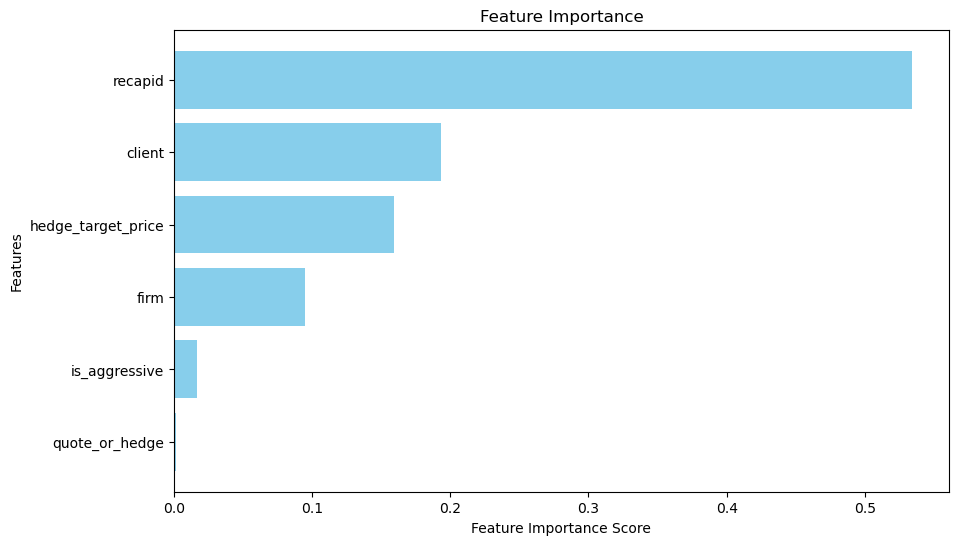

In [115]:
# Extract feature importances
feature_importances = model.feature_importances_

# Combine feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': reg_col, 'Importance': feature_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance dataframe
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Reverse order for better readability
plt.show()